In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
data.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

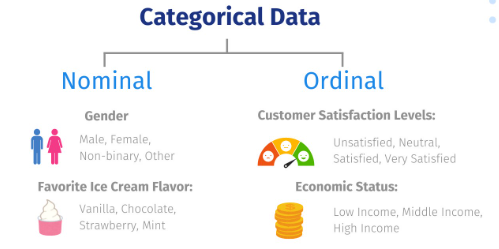

In [4]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
data_encoded = pd.get_dummies(data, columns=['sex','who','adult_male','alive'], prefix=['sex','who','adult_male','alive'],
                              dtype=int,drop_first=True) #drop_first is used to avoid multicolinerarity
data_encoded.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,sex_male,who_man,who_woman,adult_male_True,alive_yes
0,0,3,22.0,1,0,7.2500,S,Third,NaN,Southampton,False,1,1,0,1,0
1,1,1,38.0,1,0,71.2833,C,First,C,Cherbourg,False,0,0,1,0,1
2,1,3,26.0,0,0,7.9250,S,Third,NaN,Southampton,True,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,S,First,C,Southampton,False,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,S,Third,NaN,Southampton,True,1,1,0,1,0


In [6]:
data_encoded.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,sex_male,who_man,who_woman,adult_male_True,alive_yes
0,0,3,22.0,1,0,7.2500,S,Third,NaN,Southampton,False,1,1,0,1,0
1,1,1,38.0,1,0,71.2833,C,First,C,Cherbourg,False,0,0,1,0,1
2,1,3,26.0,0,0,7.9250,S,Third,NaN,Southampton,True,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,S,First,C,Southampton,False,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,S,Third,NaN,Southampton,True,1,1,0,1,0


In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [8]:
le=LabelEncoder()

In [9]:
data_encoded['Encoded_embarked'] = le.fit_transform(data_encoded.embarked)
data_encoded['Encoded_embark_town'] = le.fit_transform(data_encoded.embark_town)
data_encoded['Encoded_alone'] = le.fit_transform(data_encoded.alone)

In [11]:
data_encoded.head(20)

,survived,pclass,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,sex_male,who_man,who_woman,adult_male_True,alive_yes,Encoded_embarked,Encoded_embark_town,Encoded_alone
0,0,3,22.0,1,0,7.2500,S,Third,NaN,Southampton,False,1,1,0,1,0,2,2,0
1,1,1,38.0,1,0,71.2833,C,First,C,Cherbourg,False,0,0,1,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,S,Third,NaN,Southampton,True,0,0,1,0,1,2,2,1
3,1,1,35.0,1,0,53.1000,S,First,C,Southampton,False,0,0,1,0,1,2,2,0
4,0,3,35.0,0,0,8.0500,S,Third,NaN,Southampton,True,1,1,0,1,0,2,2,1
5,0,3,NaN,0,0,8.4583,Q,Third,NaN,Queenstown,True,1,1,0,1,0,1,1,1
6,0,1,54.0,0,0,51.8625,S,First,E,Southampton,True,1,1,0,1,0,2,2,1
7,0,3,2.0,3,1,21.0750,S,Third,NaN,Southampton,False,1,0,0,0,0,2,2,0
8,1,3,27.0,0,2,11.1333,S,Third,NaN,Southampton,False,0,0,1,0,1,2,2,0
9,1,2,14.0,1,0,30.0708,C,Second,NaN,Cherbourg,False,0,0,0,0,1,0,0,0


In [12]:
data_encoded.drop(columns=['embarked','embark_town','alone'],inplace=True)

In [13]:
data_encoded.head()

,survived,pclass,age,sibsp,parch,fare,class,deck,sex_male,who_man,who_woman,adult_male_True,alive_yes,Encoded_embarked,Encoded_embark_town,Encoded_alone
0,0,3,22.0,1,0,7.2500,Third,NaN,1,1,0,1,0,2,2,0
1,1,1,38.0,1,0,71.2833,First,C,0,0,1,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,Third,NaN,0,0,1,0,1,2,2,1
3,1,1,35.0,1,0,53.1000,First,C,0,0,1,0,1,2,2,0
4,0,3,35.0,0,0,8.0500,Third,NaN,1,1,0,1,0,2,2,1


In [14]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   survived             891 non-null    int64   
 1   pclass               891 non-null    int64   
 2   age                  714 non-null    float64 
 3   sibsp                891 non-null    int64   
 4   parch                891 non-null    int64   
 5   fare                 891 non-null    float64 
 6   class                891 non-null    category
 7   deck                 203 non-null    category
 8   sex_male             891 non-null    int64   
 9   who_man              891 non-null    int64   
 10  who_woman            891 non-null    int64   
 11  adult_male_True      891 non-null    int64   
 12  alive_yes            891 non-null    int64   
 13  Encoded_embarked     891 non-null    int64   
 14  Encoded_embark_town  891 non-null    int64   
 15  Encoded_alone        89

In [15]:
data_encoded.age.fillna(data_encoded.age.mean(),inplace=True)

/tmp/ipython-input-3869994113.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_encoded.age.fillna(data_encoded.age.mean(),inplace=True)


In [16]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   survived             891 non-null    int64   
 1   pclass               891 non-null    int64   
 2   age                  891 non-null    float64 
 3   sibsp                891 non-null    int64   
 4   parch                891 non-null    int64   
 5   fare                 891 non-null    float64 
 6   class                891 non-null    category
 7   deck                 203 non-null    category
 8   sex_male             891 non-null    int64   
 9   who_man              891 non-null    int64   
 10  who_woman            891 non-null    int64   
 11  adult_male_True      891 non-null    int64   
 12  alive_yes            891 non-null    int64   
 13  Encoded_embarked     891 non-null    int64   
 14  Encoded_embark_town  891 non-null    int64   
 15  Encoded_alone        89

In [17]:
deck_mode = data_encoded.deck.mode()
deck_mode[0]

'C'

In [18]:
data_encoded.deck.fillna(deck_mode[0],inplace=True)

/tmp/ipython-input-4049694448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_encoded.deck.fillna(deck_mode[0],inplace=True)


In [19]:
data_encoded.head()

,survived,pclass,age,sibsp,parch,fare,class,deck,sex_male,who_man,who_woman,adult_male_True,alive_yes,Encoded_embarked,Encoded_embark_town,Encoded_alone
0,0,3,22.0,1,0,7.2500,Third,C,1,1,0,1,0,2,2,0
1,1,1,38.0,1,0,71.2833,First,C,0,0,1,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,Third,C,0,0,1,0,1,2,2,1
3,1,1,35.0,1,0,53.1000,First,C,0,0,1,0,1,2,2,0
4,0,3,35.0,0,0,8.0500,Third,C,1,1,0,1,0,2,2,1


In [20]:
data_encoded['Encoded_deck'] = le.fit_transform(data_encoded.deck)

In [23]:
data_encoded['Encoded_deck'].unique()

array([2, 4, 6, 3, 0, 1, 5])

In [22]:
data_encoded.head(20)

,survived,pclass,age,sibsp,parch,fare,class,deck,sex_male,who_man,who_woman,adult_male_True,alive_yes,Encoded_embarked,Encoded_embark_town,Encoded_alone,Encoded_deck
0,0,3,22.000000,1,0,7.2500,Third,C,1,1,0,1,0,2,2,0,2
1,1,1,38.000000,1,0,71.2833,First,C,0,0,1,0,1,0,0,0,2
2,1,3,26.000000,0,0,7.9250,Third,C,0,0,1,0,1,2,2,1,2
3,1,1,35.000000,1,0,53.1000,First,C,0,0,1,0,1,2,2,0,2
4,0,3,35.000000,0,0,8.0500,Third,C,1,1,0,1,0,2,2,1,2
5,0,3,29.699118,0,0,8.4583,Third,C,1,1,0,1,0,1,1,1,2
6,0,1,54.000000,0,0,51.8625,First,E,1,1,0,1,0,2,2,1,4
7,0,3,2.000000,3,1,21.0750,Third,C,1,0,0,0,0,2,2,0,2
8,1,3,27.000000,0,2,11.1333,Third,C,0,0,1,0,1,2,2,0,2
9,1,2,14.000000,1,0,30.0708,Second,C,0,0,0,0,1,0,0,0,2


In [25]:
data_encoded['Encoded_class'] = le.fit_transform(data_encoded['class'])

In [26]:
data_encoded.head()

,survived,pclass,age,sibsp,parch,fare,class,deck,sex_male,who_man,who_woman,adult_male_True,alive_yes,Encoded_embarked,Encoded_embark_town,Encoded_alone,Encoded_deck,Encoded_class
0,0,3,22.0,1,0,7.2500,Third,C,1,1,0,1,0,2,2,0,2,2
1,1,1,38.0,1,0,71.2833,First,C,0,0,1,0,1,0,0,0,2,0
2,1,3,26.0,0,0,7.9250,Third,C,0,0,1,0,1,2,2,1,2,2
3,1,1,35.0,1,0,53.1000,First,C,0,0,1,0,1,2,2,0,2,0
4,0,3,35.0,0,0,8.0500,Third,C,1,1,0,1,0,2,2,1,2,2


In [27]:
data_encoded.drop(columns=['class'],inplace=True)

In [28]:
data_encoded.drop(columns=['deck'],inplace=True)

In [29]:
data_encoded.head(20)

,survived,pclass,age,sibsp,parch,fare,sex_male,who_man,who_woman,adult_male_True,alive_yes,Encoded_embarked,Encoded_embark_town,Encoded_alone,Encoded_deck,Encoded_class
0,0,3,22.000000,1,0,7.2500,1,1,0,1,0,2,2,0,2,2
1,1,1,38.000000,1,0,71.2833,0,0,1,0,1,0,0,0,2,0
2,1,3,26.000000,0,0,7.9250,0,0,1,0,1,2,2,1,2,2
3,1,1,35.000000,1,0,53.1000,0,0,1,0,1,2,2,0,2,0
4,0,3,35.000000,0,0,8.0500,1,1,0,1,0,2,2,1,2,2
5,0,3,29.699118,0,0,8.4583,1,1,0,1,0,1,1,1,2,2
6,0,1,54.000000,0,0,51.8625,1,1,0,1,0,2,2,1,4,0
7,0,3,2.000000,3,1,21.0750,1,0,0,0,0,2,2,0,2,2
8,1,3,27.000000,0,2,11.1333,0,0,1,0,1,2,2,0,2,2
9,1,2,14.000000,1,0,30.0708,0,0,0,0,1,0,0,0,2,1


In [30]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [31]:
data_encoded.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'who_man', 'who_woman', 'adult_male_True', 'alive_yes',
       'Encoded_embarked', 'Encoded_embark_town', 'Encoded_alone',
       'Encoded_deck', 'Encoded_class'],
      dtype='object')

In [32]:
df_mms = mms.fit_transform(data_encoded[['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'who_man', 'who_woman', 'adult_male_True', 'alive_yes',
       'Encoded_embarked', 'Encoded_embark_town', 'Encoded_alone',
       'Encoded_deck', 'Encoded_class']])

In [33]:
df_mms

array([[1.        , 0.27117366, 0.125     , ..., 0.        , 0.33333333,
        1.        ],
       [0.        , 0.4722292 , 0.125     , ..., 0.        , 0.33333333,
        0.        ],
       [1.        , 0.32143755, 0.        , ..., 1.        , 0.33333333,
        1.        ],
       ...,
       [1.        , 0.36792055, 0.125     , ..., 0.        , 0.33333333,
        1.        ],
       [0.        , 0.32143755, 0.        , ..., 1.        , 0.33333333,
        0.        ],
       [1.        , 0.39683338, 0.        , ..., 1.        , 0.33333333,
        1.        ]])

In [34]:
pd.DataFrame(df_mms,columns=['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'who_man', 'who_woman', 'adult_male_True', 'alive_yes',
       'Encoded_embarked', 'Encoded_embark_town', 'Encoded_alone',
       'Encoded_deck', 'Encoded_class'])

,pclass,age,sibsp,parch,fare,sex_male,who_man,who_woman,adult_male_True,alive_yes,Encoded_embarked,Encoded_embark_town,Encoded_alone,Encoded_deck,Encoded_class
0,1.0,0.271174,0.125,0.000000,0.014151,1.0,1.0,0.0,1.0,0.0,0.666667,0.666667,0.0,0.333333,1.0
1,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.0,0.333333,0.0
2,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0,0.0,1.0,0.666667,0.666667,1.0,0.333333,1.0
3,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0,0.0,1.0,0.666667,0.666667,0.0,0.333333,0.0
4,1.0,0.434531,0.000,0.000000,0.015713,1.0,1.0,0.0,1.0,0.0,0.666667,0.666667,1.0,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374,1.0,1.0,0.0,1.0,0.0,0.666667,0.666667,1.0,0.333333,0.5
887,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0,0.0,1.0,0.666667,0.666667,1.0,0.166667,0.0
888,1.0,0.367921,0.125,0.333333,0.045771,0.0,0.0,1.0,0.0,0.0,0.666667,0.666667,0.0,0.333333,1.0
889,0.0,0.321438,0.000,0.000000,0.058556,1.0,1.0,0.0,1.0,1.0,0.000000,0.000000,1.0,0.333333,0.0
